In [1]:
import torch

x = torch.Tensor([5,3])
y = torch.Tensor([2,1])

print(x*y) 

tensor([10.,  3.])


In [2]:
x = torch.zeros([2,5])
print(x,"\n",x.shape)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]) 
 torch.Size([2, 5])


In [3]:
y = torch.rand([2,5])
y

tensor([[0.5775, 0.5110, 0.7430, 0.5955, 0.3853],
        [0.6183, 0.5059, 0.1032, 0.3343, 0.9620]])

In [4]:
y.view([1,10])

tensor([[0.5775, 0.5110, 0.7430, 0.5955, 0.3853, 0.6183, 0.5059, 0.1032, 0.3343,
         0.9620]])

In [5]:
print(y) # y is same as before

tensor([[0.5775, 0.5110, 0.7430, 0.5955, 0.3853],
        [0.6183, 0.5059, 0.1032, 0.3343, 0.9620]])


In [6]:
y.flatten()

tensor([0.5775, 0.5110, 0.7430, 0.5955, 0.3853, 0.6183, 0.5059, 0.1032, 0.3343,
        0.9620])

In [7]:
print(y) # still same as before

tensor([[0.5775, 0.5110, 0.7430, 0.5955, 0.3853],
        [0.6183, 0.5059, 0.1032, 0.3343, 0.9620]])


In [8]:
# import torch

# # Check if CUDA (GPU) is available
# if torch.cuda.is_available():
#     print("CUDA is available. GPU is available.")
#     print(f"Number of GPUs available: {torch.cuda.device_count()}")
#     print(f"Current GPU: {torch.cuda.get_device_name(torch.cuda.current_device())}")
# else:
#     print("CUDA is not available. GPU is not available.")


In [9]:
import torch
import torchvision

from torchvision import transforms, datasets

C:\Users\opdar\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\opdar\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [10]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor()
])

train = datasets.MNIST('../', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('../', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:04<00:00, 2449409.66it/s]


Extracting ../MNIST\raw\train-images-idx3-ubyte.gz to ../MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 120031.52it/s]


Extracting ../MNIST\raw\train-labels-idx1-ubyte.gz to ../MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 1023621.43it/s]


Extracting ../MNIST\raw\t10k-images-idx3-ubyte.gz to ../MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 2272519.24it/s]

Extracting ../MNIST\raw\t10k-labels-idx1-ubyte.gz to ../MNIST\raw



In [11]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)

tensor([3, 1, 8, 5, 4, 9, 1, 8, 2, 1])


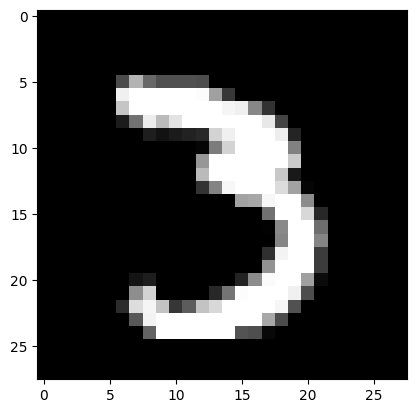

In [12]:
import matplotlib.pyplot as plt
for data in trainset:
    x, y = data
    print(y)
    
    # Take the first image from the batch and visualize it
    img = x[0]
    plt.imshow(img.squeeze(), cmap='gray')
    plt.show()
    break  # Remove this break statement to visualize more images


## Building Nueral Network

In [13]:
import torch.nn as nn
import torch.nn.functional as F

In [14]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)
        

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [15]:
x = torch.rand((28,28))
print(net.forward(x.view(-1,28*28)))

tensor([[-2.1464, -2.2414, -2.3544, -2.4103, -2.2309, -2.3024, -2.3842, -2.3098,
         -2.3552, -2.3199]], grad_fn=<LogSoftmaxBackward0>)


## Gradients

The `net.zero_grad()` function is a crucial step in the training loop of a neural network using PyTorch. To understand its importance, let's break down what it does and why it's necessary:

### What `net.zero_grad()` Does:
`net.zero_grad()` resets the gradients of all the model parameters to zero. In PyTorch, the gradients are accumulated by default, which means that they are not automatically reset after each backward pass (backpropagation). Instead, they are added to the existing gradients.

### Why Zeroing Gradients is Necessary:
During the training of a neural network, the following steps are typically performed in each iteration of the training loop:
1. **Forward Pass**: Compute the model's output for the given input data.
2. **Compute Loss**: Calculate the loss (error) between the model's output and the true labels.
3. **Backward Pass**: Perform backpropagation to compute the gradients of the loss with respect to the model parameters.
4. **Update Parameters**: Update the model parameters using the computed gradients.

If you do not zero the gradients before the backward pass, the gradients from the previous batch will be accumulated with the gradients from the current batch. This will lead to incorrect updates of the model parameters because the gradients will not reflect the true gradient of the loss for the current batch. 

### Example Training Loop:
Here is how the training loop should look including `net.zero_grad()` and the other steps mentioned:

```python
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()  # Assuming a classification task

epochs = 5

for epoch in range(epochs):
    for data in trainset:
        inputs, labels = data
        
        optimizer.zero_grad()  # Zero the gradients
        outputs = net(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass (compute gradients)
        optimizer.step()  # Update parameters
```

### Key Points:
1. **Forward Pass**: `outputs = net(inputs)` computes the model's predictions.
2. **Compute Loss**: `loss = criterion(outputs, labels)` calculates the loss.
3. **Backward Pass**: `loss.backward()` computes the gradients of the loss with respect to each parameter.
4. **Update Parameters**: `optimizer.step()` updates the model parameters using the computed gradients.
5. **Zero Gradients**: `optimizer.zero_grad()` or `net.zero_grad()` resets the gradients before the next iteration.

### Why Use `optimizer.zero_grad()` Instead of `net.zero_grad()`:
- `optimizer.zero_grad()` is preferred because it ensures that gradients of all the parameters that the optimizer is responsible for are zeroed out. This is especially useful if you have multiple optimizers or if not all parameters of the model are being optimized by a single optimizer.
- If you use `net.zero_grad()`, it will zero out the gradients of all parameters in `net`, regardless of whether they are being optimized by the current optimizer. 

In most cases, both will work fine if you are dealing with a single model and a single optimizer. However, using `optimizer.zero_grad()` is generally recommended for clarity and safety in more complex setups.

In [40]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)

epochs = 3

for epoch in range(epochs):
    for data in trainset:
        x,y = data
        net.zero_grad()
        output = net(x.view(-1,28*28))
        loss = F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
    print("Loss:",loss)
        
        

Loss: tensor(0.1540, grad_fn=<NllLossBackward0>)
Loss: tensor(0.2820, grad_fn=<NllLossBackward0>)
Loss: tensor(0.0023, grad_fn=<NllLossBackward0>)


In [47]:
correct = 0
total = 0

with torch.no_grad(): # don't calculate gradients here
    for data in testset:
        x,y = data 
        output = net(x.view(-1,28*28))
        for idx,i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total+=1
print("Accuracy: ",round(correct/total,3))

Accuracy:  0.971


In [48]:
print(correct,total)

9707 10000


## Convolution Nueral Networks